# Laborator 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercițiul 1

In [ ]:
# Transformata Fourier de mână pentru N = 8
N = 8

F = np.zeros((N, N), dtype=complex)

for i in range(N):
    for j in range(N):
        F[i, j] = np.e ** (-2j * np.pi * i * j / N)

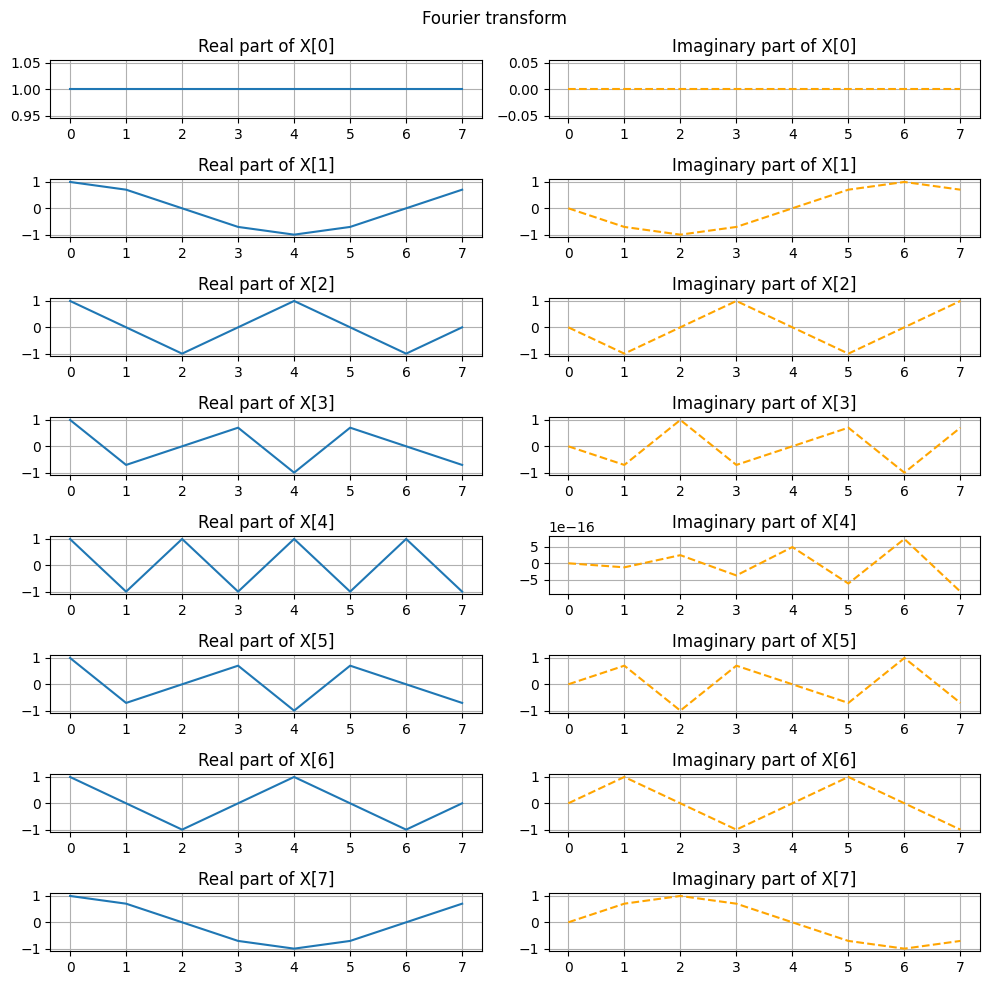

In [60]:
fig, axs = plt.subplots(N, 2, figsize=(10, 10))
for i in range(N):
    for j in range(2):
        if j == 0:
            axs[i, j].plot(F[i, :].real)
            axs[i, j].set_title(f'Real part of X[{i}]')
        else:
            axs[i, j].plot(F[i, :].imag, linestyle='--', c='orange')
            axs[i, j].set_title(f'Imaginary part of X[{i}]')
        axs[i, j].grid()
plt.suptitle("Fourier transform")
plt.tight_layout()
plt.savefig("fourier.pdf")
plt.show()

#### Verificați că matricea Fourier F este unitară (complexă și ortogonală)

Ortogonală: F * FH = n * I

FH = FT' (conjugat)

In [33]:
F_H = F.T.conj()
is_orthogonal = np.linalg.norm(np.abs(F_H @ F) - N * np.identity(N)) <= 1e-10
# is_orthogonal = np.allclose(np.dot(F_H, F), N * np.eye(N), atol=1e-10)

print('Matricea Fourier' + (' ' if is_orthogonal else ' nu ') + 'este ortogonala')

Matricea Fourier este ortogonala


### Exercițiul 2



In [101]:
f = 10 # Frecventa semnalului
fs = 1000 # Frecventa de esantionare

t = np.linspace(0, 1, fs)   # Timpul semnalului
x = np.sin(2 * np.pi * f * t) 


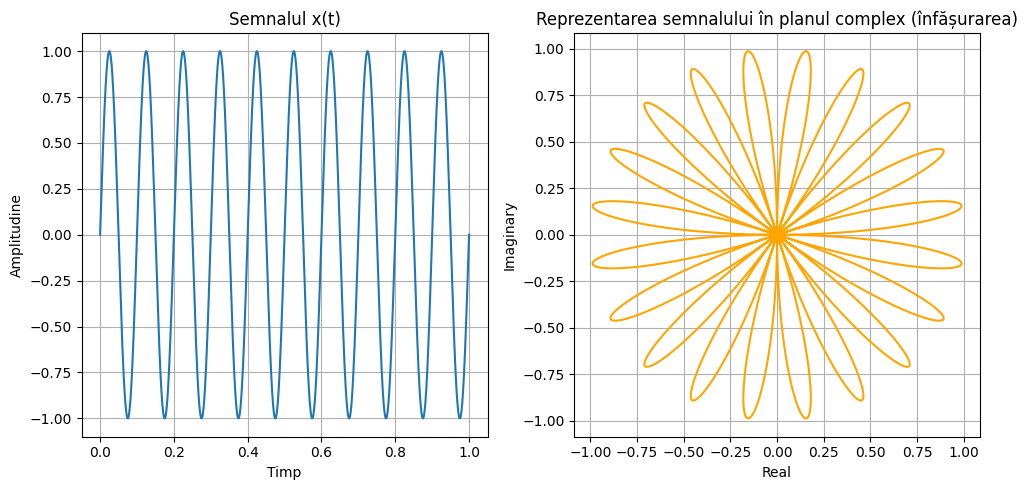

In [99]:
# Cercul unitate in planul complex
y = x * np.e ** (-2j * np.pi * t) # Înfășurarea semnalului x(t) pe cercul unitate
# y[n] = x[n] * e^(-2j * pi * n)


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(t, x)
axs[0].set_title("Semnalul x(t)")
axs[0].set_xlabel("Timp")
axs[0].set_ylabel("Amplitudine")
axs[0].grid()

axs[1].plot(y.real, y.imag, c='orange')
axs[1].set_title("Reprezentarea semnalului în planul complex (înfășurarea)")
axs[1].set_xlabel("Real")
axs[1].set_ylabel("Imaginary")
axs[1].grid()

plt.tight_layout()
# plt.savefig("semnal.pdf")
plt.show()


Dacă w este egal cu frecvența semnalului, atunci se va forma un cerc.

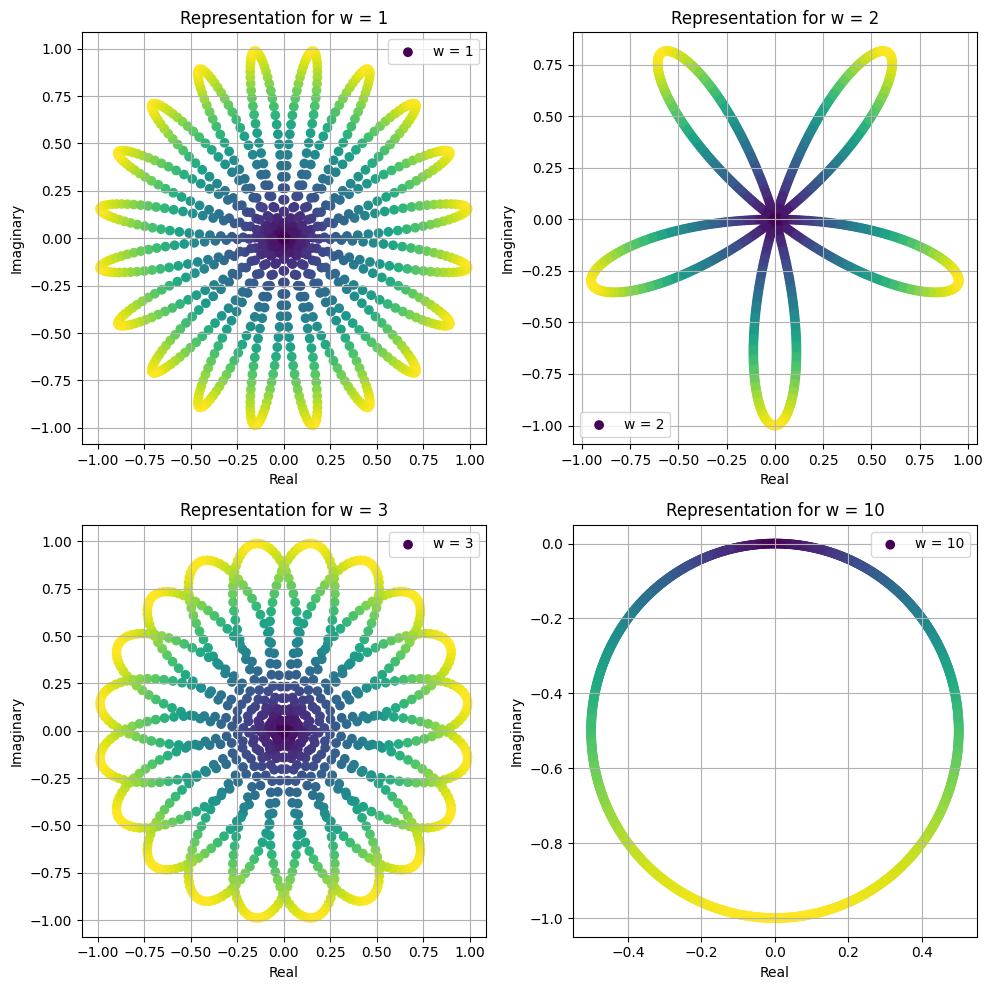

In [102]:
w = [1, 2, 3, 10] # Frecventele de înfășurare
z = np.array([x * np.e ** (-2j * np.pi * fw * t) for fw in w])

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Magnitudinile semnalelor
colors = [np.abs(zi) for zi in z] 

for i in range(len(w)):
    row, col = i // 2, i % 2 
    axs[row, col].scatter(z[i].real, z[i].imag, label=f'w = {w[i]}', c=colors[i])
    # axs[row, col].plot(z[i].real, z[i].imag, label=f'w = {w[i]}')
    axs[row, col].legend()
    axs[row, col].set_title(f'Representation for w = {w[i]}')
    axs[row, col].set_xlabel("Real")
    axs[row, col].set_ylabel("Imaginary")
    axs[row, col].grid()

plt.tight_layout()
# plt.savefig("înfășurare.pdf")
plt.show()


### Exercițiul 3


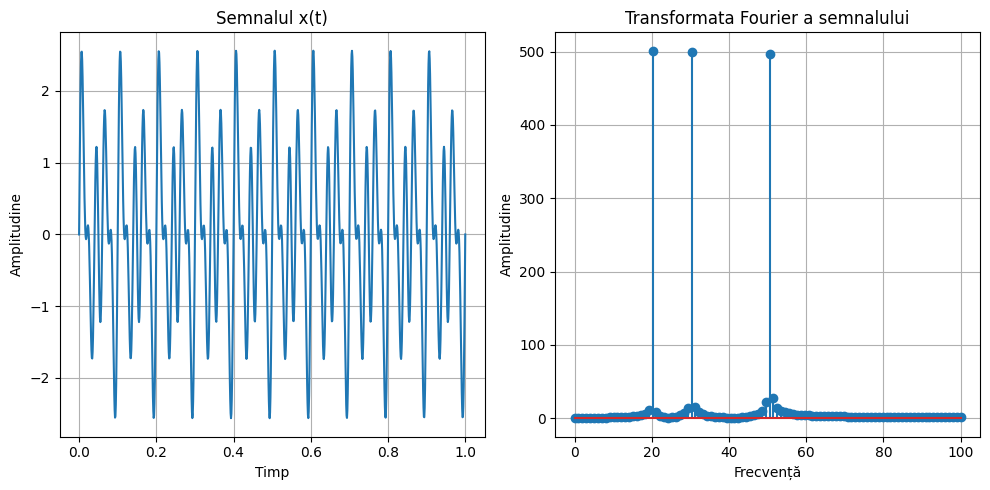

In [125]:
N = 1000
t = np.linspace(0, 1, N)

f = [20, 30, 50]    # Frecvențele semnalelor

semnal = np.zeros_like(t)   # Semnalul combinat
for fi in f:
    semnal += np.sin(2 * np.pi * fi * t)

semnal_dft = np.zeros(N, dtype=complex) # Transformata Fourier a semnalului
for k in range(N):
    for n in range(N):
        semnal_dft[k] += semnal[n] * np.e ** (-2j * np.pi * k * n / N)

semnal_dft = np.abs(semnal_dft)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(t, semnal)
axs[0].set_title("Semnalul x(t)")
axs[0].set_xlabel("Timp")
axs[0].set_ylabel("Amplitudine")
axs[0].grid()

axs[1].stem(np.linspace(0, 100, 100), semnal_dft[:100])
axs[1].set_title("Transformata Fourier a semnalului")
axs[1].set_xlabel("Frecvență")
axs[1].set_ylabel("Amplitudine")
axs[1].grid()

plt.tight_layout()
plt.savefig("semnal_fourier.pdf")
plt.show()


#### Ajustați frecvențele de înfășurare w utilizate în transformata Fourier în funcție de frecvența caracteristică a sinusoidei.


In [ ]:
# ???